#Importing libraries and cleaned_df_Eg dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cbm_vbm_new.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Cs,FA,MA,Pb,Sn,I,Br,ML_Eg,BG,CBM,VBM
0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.434,1.564,-3.9,-5.45
1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.438,1.709,-3.6,-5.40


#Heatmap

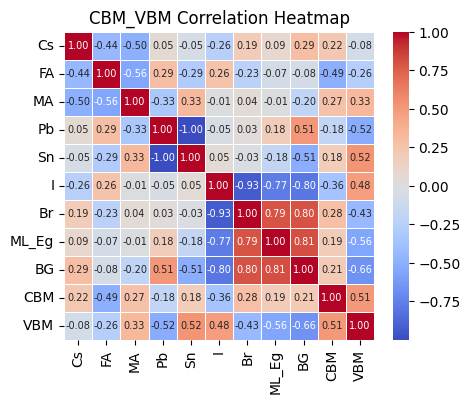

In [3]:
df1=df.iloc[:,0:]
corr_matrix = df1.corr()

# Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,  annot_kws={"size": 7})
plt.title('CBM_VBM Correlation Heatmap')
plt.savefig('CBM_VBM Correlation Heatmap.png')
plt.show()

#Data Prep

In [4]:
dfx=df.iloc[:,:-2]
X=dfx.values
y=df.iloc[:,-1].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br,ML_Eg,BG
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0,1.434,1.564
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0,1.438,1.709
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.523,1.877
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0,1.589,2.328
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0,1.257,1.255
...,...,...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0,1.275,1.285
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0,1.378,1.307
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.523,1.877
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0,1.356,1.419


#Ensemble Learning

##Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.1887
Standard Deviation: 0.0365


In [6]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value1)
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R value: 0.821609718273773
MSE on Test Set: 0.016866117689359385
RMSE on Test Set: 0.12986961803808997


In [7]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p1)
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R value: 0.9496738797321381
MSE on Train Set: 0.010251689068402372
RMSE on Train Set: 0.10125062502721834


In [8]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[-5.12 -4.88]
 [-5.44 -5.6 ]
 [-5.06 -5.08]
 [-5.58 -5.6 ]
 [-5.55 -5.62]
 [-5.63 -5.4 ]
 [-5.7  -5.75]
 [-5.65 -5.67]
 [-5.44 -5.45]
 [-5.6  -5.5 ]
 [-5.39 -5.4 ]
 [-5.37 -5.4 ]
 [-5.48 -5.8 ]
 [-5.53 -5.4 ]
 [-5.48 -5.46]
 [-5.52 -5.57]
 [-5.6  -5.7 ]]


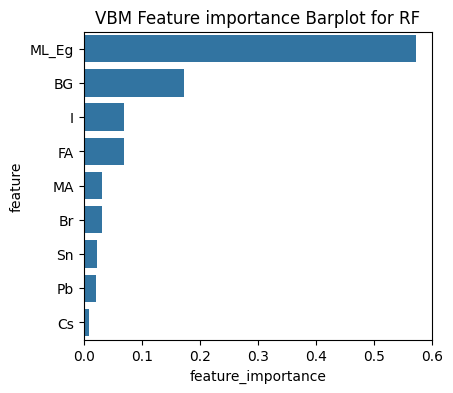

In [9]:
feature_importance = rf.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('VBM Feature importance Barplot for RF')
plt.savefig('VBM Feature importance Barplot for RF.png')

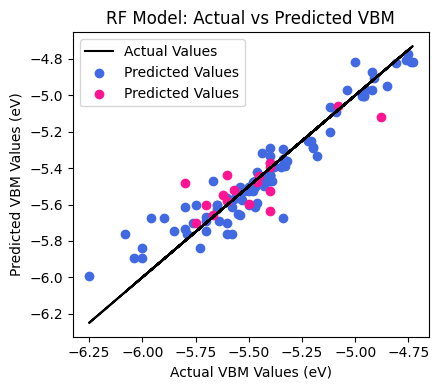

In [10]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Predicted Values')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('RF Model: Actual vs Predicted VBM')
plt.savefig('RF Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

##Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=100)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.1979
Standard Deviation: 0.0423


In [12]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value2)
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R value: 0.7219353116926949
MSE on Test Set: 0.02499106729832379
RMSE on Test Set: 0.1580856328017312


In [13]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p2)
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R value: 0.9605949435221653
MSE on Train Set: 0.007908175851365202
RMSE on Train Set: 0.08892792503688142


In [14]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[-5.21 -4.88]
 [-5.42 -5.6 ]
 [-5.01 -5.08]
 [-5.54 -5.6 ]
 [-5.57 -5.62]
 [-5.65 -5.4 ]
 [-5.62 -5.75]
 [-5.56 -5.67]
 [-5.41 -5.45]
 [-5.59 -5.5 ]
 [-5.37 -5.4 ]
 [-5.37 -5.4 ]
 [-5.45 -5.8 ]
 [-5.56 -5.4 ]
 [-5.45 -5.46]
 [-5.52 -5.57]
 [-5.56 -5.7 ]]


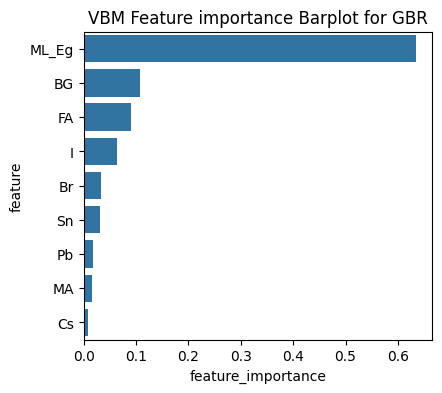

In [15]:
feature_importance = gbr.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('VBM Feature importance Barplot for GBR')
plt.savefig('VBM Feature importance Barplot for GBR.png')

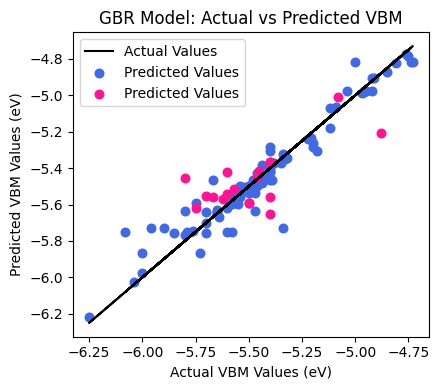

In [16]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Predicted Values')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Predicted Values')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted VBM')
plt.savefig('GBR Model: Actual vs Predicted VBM.png')

plt.tight_layout()
plt.show()

##XGBoost

In [17]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=100)
xgb = xgb.XGBRegressor()
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.2085
Standard Deviation: 0.0538


In [18]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value3)
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R value: 0.7263131636699087
RMSE on Test Set: 0.16488558233925474


In [19]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p3)
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R value: 0.9633813374287641
MSE on Train Set: 0.007326207019383493
RMSE on Train Set: 0.08559326503518541


In [20]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[-4.86 -4.88]
 [-5.4  -5.6 ]
 [-5.13 -5.08]
 [-5.61 -5.6 ]
 [-5.43 -5.62]
 [-5.75 -5.4 ]
 [-5.6  -5.75]
 [-5.54 -5.67]
 [-5.34 -5.45]
 [-5.64 -5.5 ]
 [-5.36 -5.4 ]
 [-5.4  -5.4 ]
 [-5.43 -5.8 ]
 [-5.55 -5.4 ]
 [-5.48 -5.46]
 [-5.46 -5.57]
 [-5.56 -5.7 ]]


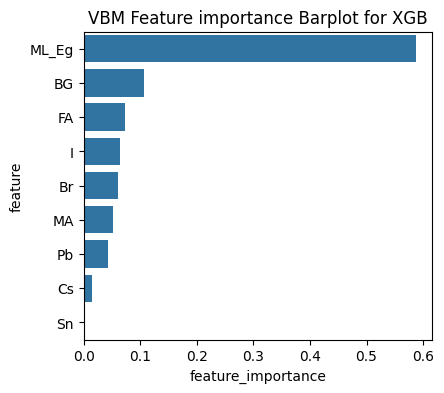

In [21]:
feature_importance = xgb.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('VBM Feature importance Barplot for XGB')
plt.savefig('VBM Feature importance Barplot for XGB.png')

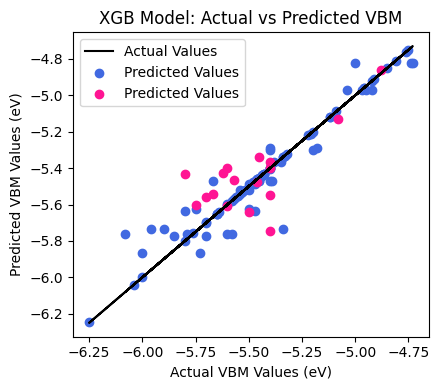

In [22]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Predicted Values')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('XGB Model: Actual vs Predicted VBM')
plt.savefig('XGB Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

##CatBoost

In [23]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
catboost = CatBoostRegressor()
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Learning rate set to 0.027134
0:	learn: 0.2836238	total: 651us	remaining: 650ms
1:	learn: 0.2803219	total: 1.08ms	remaining: 539ms
2:	learn: 0.2772044	total: 1.46ms	remaining: 486ms
3:	learn: 0.2741426	total: 1.87ms	remaining: 465ms
4:	learn: 0.2709704	total: 2.25ms	remaining: 449ms
5:	learn: 0.2679330	total: 2.68ms	remaining: 444ms
6:	learn: 0.2647938	total: 3.07ms	remaining: 436ms
7:	learn: 0.2614382	total: 3.44ms	remaining: 427ms
8:	learn: 0.2584524	total: 3.86ms	remaining: 425ms
9:	learn: 0.2559079	total: 4.24ms	remaining: 420ms
10:	learn: 0.2530078	total: 4.63ms	remaining: 416ms
11:	learn: 0.2502028	total: 5ms	remaining: 412ms
12:	learn: 0.2470044	total: 5.37ms	remaining: 408ms
13:	learn: 0.2443764	total: 5.8ms	remaining: 408ms
14:	learn: 0.2417840	total: 6.4ms	remaining: 420ms
15:	learn: 0.2394091	total: 6.95ms	remaining: 428ms
16:	learn: 0.2368310	total: 7.33ms	remaining: 424ms
17:	learn: 0.2344614	total: 7.71ms	remaining: 421ms
18:	learn: 0.2322443	total: 8.08ms	remaining: 417m

In [24]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value4)
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R value: 0.735196692914291
MSE on Test Set: 0.02446252070106858
RMSE on Test Set: 0.15640498937396013


In [25]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p4)
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R value: 0.9621125177616776
MSE on Train Set: 0.007590964158873723
RMSE on Train Set: 0.08712613935480971


In [26]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[-5.1  -4.88]
 [-5.43 -5.6 ]
 [-5.29 -5.08]
 [-5.56 -5.6 ]
 [-5.51 -5.62]
 [-5.68 -5.4 ]
 [-5.61 -5.75]
 [-5.54 -5.67]
 [-5.45 -5.45]
 [-5.58 -5.5 ]
 [-5.37 -5.4 ]
 [-5.39 -5.4 ]
 [-5.46 -5.8 ]
 [-5.57 -5.4 ]
 [-5.48 -5.46]
 [-5.5  -5.57]
 [-5.58 -5.7 ]]


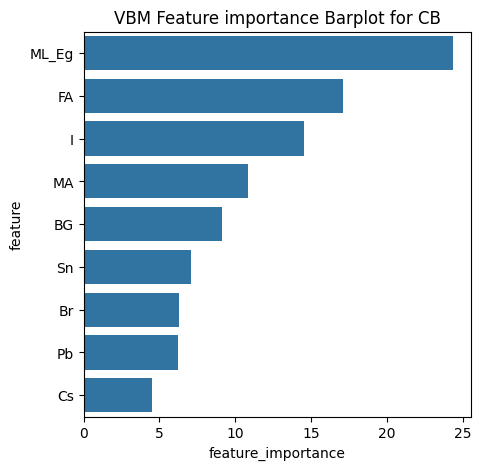

In [27]:
feature_importance = catboost.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(5, 5))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('VBM Feature importance Barplot for CB')
plt.savefig('VBM Feature importance Barplot for CB.png')
plt.show()


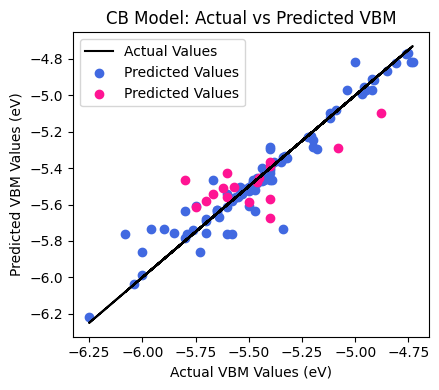

In [28]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Predicted Values')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('CB Model: Actual vs Predicted VBM')
plt.savefig('CB Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

#Hyperparameter tuning using Optuna

##Tuning of RF

In [29]:
import optuna
def objective1(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train1, y_train1, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse

# Create the Optuna study and optimize the objective function
study1 = optuna.create_study(direction='minimize')
study1.optimize(objective1, n_trials=100)

[I 2025-03-26 23:25:57,069] A new study created in memory with name: no-name-26011e9e-333b-491c-8cda-a45d13d43c18
[I 2025-03-26 23:26:01,476] Trial 0 finished with value: 0.2506960071083964 and parameters: {'n_estimators': 1938, 'max_depth': 34, 'min_samples_split': 32, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 0 with value: 0.2506960071083964.
[I 2025-03-26 23:26:04,568] Trial 1 finished with value: 0.20555158239751614 and parameters: {'n_estimators': 1642, 'max_depth': 46, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.20555158239751614.
[I 2025-03-26 23:26:07,000] Trial 2 finished with value: 0.24188837517773695 and parameters: {'n_estimators': 1129, 'max_depth': 48, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 1 with value: 0.20555158239751614.
[I 2025-03-26 23:26:08,690] Trial 3 finished with value: 0.2422787954445384 and parameters: {'n_estimators': 619, 'max_dept

In [30]:
# Print the best hyperparameters and the best score
print('Best trial:', study1.best_trial.number)
print("Best hyperparameters: ", study1.best_params)
print("Best RMSE: ", study1.best_value)

Best trial: 96
Best hyperparameters:  {'n_estimators': 924, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best RMSE:  0.18994970681688017


In [31]:
# Train the model with the best hyperparameters
rf_params = {'n_estimators': 924,
             'max_depth': 20,
             'min_samples_split': 3,
             'min_samples_leaf': 1,
             'max_features': 'log2'
}

# Initialize the Random Forest model with the defined hyperparameters
best_rf = RandomForestRegressor(**rf_params, random_state=100)
# Calculate cross-validated RMSE
mse_scores_c1 = cross_val_score(estimator=best_rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c1 = np.sqrt(-mse_scores_c1)
print("RMSE: {:.4f}".format(rmse_scores_c1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c1.std()))

RMSE: 0.1862
Standard Deviation: 0.0375


In [32]:
best_rf.fit(X_train1,y_train1)

y_pred_n1=best_rf.predict(X_test1)
y_pred_n1=y_pred1.reshape(len(y_pred1),1)
r_value_n1 = np.corrcoef(y_test1.squeeze(), y_pred_n1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred_n1))
print("R value:", r_value_n1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred_n1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred_n1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred_n1)))

R2 on Test Set: 0.6676638385861358
R value: 0.821609718273773
MAE on Test Set: 0.0920341876750711
MSE on Test Set: 0.016866117689359385
RMSE on Test Set: 0.12986961803808997


In [33]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.8993926824985038
R value: 0.9496738797321381
MAE on Train Set: 0.07286690860215078
MSE on Train Set: 0.010251689068402372
RMSE on Train Set: 0.10125062502721834


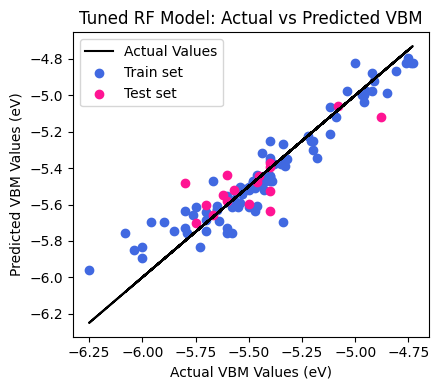

In [34]:
y_train_pred_n1=best_rf.predict(X_train1)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred_n1, color='royalblue', label='Train set')
plt.scatter(y_test1, y_pred_n1, color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned RF Model: Actual vs Predicted VBM')
plt.savefig('Tuned RF Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

##Tuning for Gradient Boosting

In [35]:
import optuna
def objective2(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Create the Gradient Boosting model
    model = GradientBoostingRegressor(**params, random_state=100)

    # Perform cross-validation
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=100)

[I 2025-03-26 23:27:54,799] A new study created in memory with name: no-name-6f0b737a-692b-469d-9659-cca550565a13
[I 2025-03-26 23:27:55,929] Trial 0 finished with value: 0.21773238720306307 and parameters: {'n_estimators': 459, 'max_depth': 6, 'learning_rate': 0.15521827165767324, 'subsample': 0.770845955248774, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.21773238720306307.
[I 2025-03-26 23:27:58,047] Trial 1 finished with value: 0.22612398240570583 and parameters: {'n_estimators': 877, 'max_depth': 5, 'learning_rate': 0.2985706097330826, 'subsample': 0.5085799626720884, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.21773238720306307.
[I 2025-03-26 23:27:58,403] Trial 2 finished with value: 0.18837230149406464 and parameters: {'n_estimators': 144, 'max_depth': 9, 'learning_rate': 0.09123007942877882, 'subsample': 0.7492143882828264, 'min_samples_split': 7, 'min_samples_leaf

In [36]:
# Print the best hyperparameters and the best score
print('Best trial:', study2.best_trial.number)
print("Best hyperparameters: ", study2.best_params)
print("Best RMSE: ", study2.best_value)

Best trial: 86
Best hyperparameters:  {'n_estimators': 562, 'max_depth': 8, 'learning_rate': 0.06614892299491022, 'subsample': 0.6340235923002038, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Best RMSE:  0.1796558318339278


In [37]:
# Train the final model with the best hyperparameters
best_gbr = GradientBoostingRegressor(n_estimators= 562, max_depth= 8, learning_rate=0.06614892299491022,
                                  subsample= 0.6340235923002038, min_samples_split= 7,
                                     min_samples_leaf=10, max_features='sqrt', random_state=100)
best_gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores_c2 = cross_val_score(estimator=best_gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c2 = np.sqrt(-mse_scores_c2)
print("RMSE: {:.4f}".format(rmse_scores_c2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c2.std()))

RMSE: 0.1752
Standard Deviation: 0.0398


In [38]:
#TEST set
y_pred_n2=best_gbr.predict(X_test2)
y_pred_n2=y_pred_n2.reshape(len(y_pred_n2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred_n2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred_n2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred_n2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred_n2)))

R2 on Test Set: 0.5430015496094371
R value: 0.7392697471598811
MAE on Test Set: 0.11932682581010343
MSE on Test Set: 0.0231927504227969
RMSE on Test Set: 0.15229166235482788


In [39]:
#GBR on Train set
y_train_pred_n2 = best_gbr.predict(X_train2)

y_train_pred_n2=y_train_pred_n2.reshape(len(y_train_pred_n2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train2, y_train_pred_n2))
print("R value:", r_value_p2)
print("MAE on Train Set:", mean_absolute_error(y_train2, y_train_pred_n2))
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred_n2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred_n2)))

R2 on Train Set: 0.9039119663758751
R value: 0.9510861317676619
MAE on Train Set: 0.06471476979333886
MSE on Train Set: 0.009791182871902645
RMSE on Train Set: 0.09895040612297983


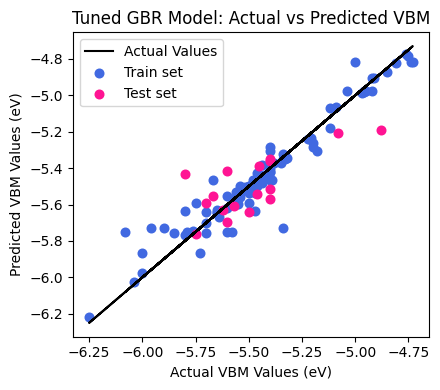

In [40]:
#Plot
y_train_pred_n2=best_gbr.predict(X_train2)

# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred_n2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned GBR Model: Actual vs Predicted VBM')
plt.savefig('Tuned GBR Model: Actual vs Predicted VBM.png')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##Tuning of XGBoost

In [41]:
from xgboost import XGBRegressor
def objective3(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5)
    }

    # Create the XGBoost model
    model = XGBRegressor(**params, random_state=100, use_label_encoder=False, eval_metric='rmse')

    # Perform cross-validation
    score = cross_val_score(model, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=100)

[I 2025-03-26 23:31:37,330] A new study created in memory with name: no-name-4726c5b5-185c-442f-9d3c-027b9319542c
[I 2025-03-26 23:31:37,817] Trial 0 finished with value: 0.21084337596261635 and parameters: {'n_estimators': 756, 'max_depth': 9, 'learning_rate': 0.2623631822478638, 'subsample': 0.5869087245032265, 'min_child_weight': 8, 'colsample_bytree': 0.904306292957949, 'gamma': 0.18572116209612244}. Best is trial 0 with value: 0.21084337596261635.
[I 2025-03-26 23:31:38,029] Trial 1 finished with value: 0.21684903015316107 and parameters: {'n_estimators': 294, 'max_depth': 6, 'learning_rate': 0.034693137419743315, 'subsample': 0.540847799450955, 'min_child_weight': 8, 'colsample_bytree': 0.7861892819209373, 'gamma': 0.26185028186137554}. Best is trial 0 with value: 0.21084337596261635.
[I 2025-03-26 23:31:38,504] Trial 2 finished with value: 0.22471525197865938 and parameters: {'n_estimators': 839, 'max_depth': 7, 'learning_rate': 0.14789656989022423, 'subsample': 0.55082420119954

In [42]:
# Print the best hyperparameters and the corresponding R2 score
print(f'Best trial: {study3.best_trial.number}')
print(f'Best value (R2): {study3.best_trial.value}')
print(f'Best hyperparameters: {study3.best_trial.params}')

Best trial: 91
Best value (R2): 0.17887322299464872
Best hyperparameters: {'n_estimators': 632, 'max_depth': 9, 'learning_rate': 0.26817982994446143, 'subsample': 0.9713184777523907, 'min_child_weight': 3, 'colsample_bytree': 0.8099275908833169, 'gamma': 0.062027363871320185}


In [43]:
from xgboost import XGBRegressor
xgb_params = study3.best_trial.params
# Train the final model with the best hyperparameters
best_xgb = XGBRegressor(**xgb_params, random_state=100)
best_xgb.fit(X_train3, y_train3)

# Evaluating with cross-validation
mse_scores_n3 = cross_val_score(best_xgb, X_train3, y_train3, cv=5,  scoring='neg_mean_squared_error')
rmse_scores_n3 = np.sqrt(-mse_scores_n3)
print("RMSE: {:.4f}".format(rmse_scores_n3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_n3.std()))

RMSE: 0.1739
Standard Deviation: 0.0420


In [44]:
y_pred_n3=best_xgb.predict(X_test3)
y_pred_n3=y_pred_n3.reshape(len(y_pred_n3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred_n3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred_n3))
print("MSE on Test Set:", mean_squared_error(y_test3, y_pred_n3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred_n3)))

R2 on Test Set: 0.7389331681664437
R value: 0.8632835251978794
MAE on Test Set: 0.08422187917372756
MSE on Test Set: 0.013249186882824917
RMSE on Test Set: 0.11510511232271535


In [45]:
#XGB on Train set
y_train_pred_n3 = best_xgb.predict(X_train3)

y_train_pred_n3=y_train_pred_n3.reshape(len(y_train_pred_n3),1)
r_value_p3 = np.corrcoef(y_train4.squeeze(), y_train_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred_n3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred_n3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred_n3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred_n3)))

R2 on Train Set: 0.8390888338474498
R value: 0.9188681757992225
MAE on Train Set: 0.09529162929904078
MSE on Train Set: 0.01639653341324248
RMSE on Train Set: 0.1280489492859761


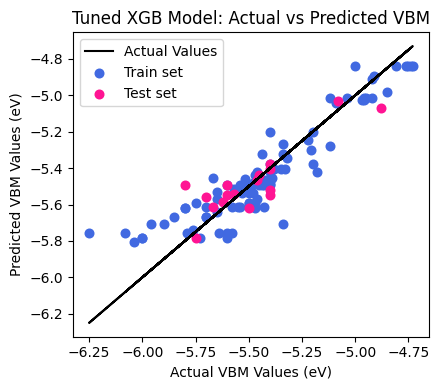

In [46]:
y_train_pred_n3 = best_xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred_n3, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test3, y_pred_n3, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned XGB Model: Actual vs Predicted VBM')
plt.savefig('Tuned XGB Model: Actual vs Predicted VBM.png')

plt.tight_layout()
plt.show()

##Tuning of CatBoost

In [47]:
import optuna
def objective4(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Create the CatBoost model
    model = CatBoostRegressor(
        **params,
        logging_level='Silent',
        random_seed=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train4, y_train4, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize the objective function
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=100)

[I 2025-03-26 23:32:59,383] A new study created in memory with name: no-name-86b7296b-d0e4-42fe-a17c-2e884d8b478e
[I 2025-03-26 23:33:01,761] Trial 0 finished with value: 0.2157580744708945 and parameters: {'iterations': 899, 'depth': 5, 'learning_rate': 0.016288817323645913, 'l2_leaf_reg': 5.179025475036776e-05, 'bagging_temperature': 0.9049613398927117, 'random_strength': 0.00010152759103514923, 'border_count': 202, 'od_type': 'Iter', 'od_wait': 11}. Best is trial 0 with value: 0.2157580744708945.
[I 2025-03-26 23:33:03,191] Trial 1 finished with value: 0.2207990089446406 and parameters: {'iterations': 164, 'depth': 9, 'learning_rate': 0.03762261688573506, 'l2_leaf_reg': 0.05705374897457438, 'bagging_temperature': 0.7687768607207089, 'random_strength': 4.3177025090425864e-08, 'border_count': 201, 'od_type': 'IncToDec', 'od_wait': 48}. Best is trial 0 with value: 0.2157580744708945.
[I 2025-03-26 23:33:05,007] Trial 2 finished with value: 0.21934011229014605 and parameters: {'iteratio

In [48]:
# Print the best hyperparameters and the best score
print(f'Best trial: {study4.best_trial.number}')
print("Best hyperparameters: ", study4.best_params)
print("Best RMSE: ", study4.best_value)

Best trial: 93
Best hyperparameters:  {'iterations': 717, 'depth': 7, 'learning_rate': 0.010336539523869355, 'l2_leaf_reg': 4.542162518691569, 'bagging_temperature': 0.482632888212395, 'random_strength': 7.045044413043532, 'border_count': 106, 'od_type': 'IncToDec', 'od_wait': 40}
Best RMSE:  0.18431428784767706


In [49]:
# Train the model with the best hyperparameters
best_cb = CatBoostRegressor(
    **study4.best_params,
    random_seed=100
)
best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2858920	total: 977us	remaining: 700ms
1:	learn: 0.2848847	total: 1.61ms	remaining: 575ms
2:	learn: 0.2838722	total: 2.35ms	remaining: 559ms
3:	learn: 0.2828085	total: 3.07ms	remaining: 547ms
4:	learn: 0.2818166	total: 3.77ms	remaining: 537ms
5:	learn: 0.2808400	total: 4.35ms	remaining: 516ms
6:	learn: 0.2800144	total: 4.89ms	remaining: 496ms
7:	learn: 0.2789763	total: 5.47ms	remaining: 485ms
8:	learn: 0.2783034	total: 6.09ms	remaining: 479ms
9:	learn: 0.2771537	total: 6.56ms	remaining: 464ms
10:	learn: 0.2762077	total: 7.52ms	remaining: 483ms
11:	learn: 0.2751384	total: 8.24ms	remaining: 484ms
12:	learn: 0.2741894	total: 9.02ms	remaining: 489ms
13:	learn: 0.2734728	total: 10ms	remaining: 503ms
14:	learn: 0.2726108	total: 10.6ms	remaining: 497ms
15:	learn: 0.2716169	total: 11.2ms	remaining: 492ms
16:	learn: 0.2706292	total: 11.8ms	remaining: 485ms
17:	learn: 0.2697559	total: 12.3ms	remaining: 477ms
18:	learn: 0.2688792	total: 12.8ms	remaining: 471ms
19:	learn: 0.2679254	tota

In [50]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.5624585867058125
R value: 0.7820085633135788
MAE on Test Set: 0.11771804981379282
MSE on Test Set: 0.02220530242388646
RMSE on Test Set: 0.1490144369646326


In [51]:
#CB on Train set
y_train_pred_n4 = best_cb.predict(X_train4)

y_train_pred_n4=y_train_pred_n4.reshape(len(y_train_pred_n4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred_n4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred_n4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred_n4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred_n4)))

R2 on Train Set: 0.8583464586026442
R value: 0.9294895006094547
MAE on Train Set: 0.09259681094727368
MSE on Train Set: 0.01443421907976185
RMSE on Train Set: 0.12014249489569397


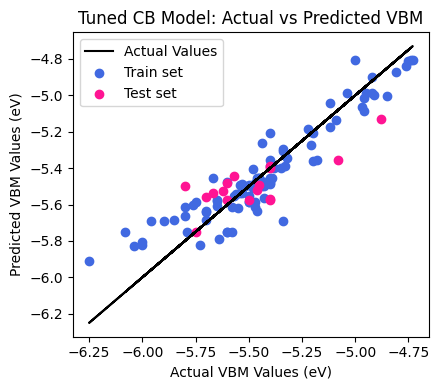

In [52]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred_n4, color='royalblue', label='Train set')
plt.scatter(y_test4, y_pred_n4, color='deeppink', label='Test set')

plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned CB Model: Actual vs Predicted VBM')
plt.savefig('Tuned CB Model: Actual vs Predicted VBM.png')


plt.tight_layout()
plt.show()

#SHAP Analysis

In [53]:
import shap
shap.initjs()

In [54]:
dfx.shape

(110, 9)

In [55]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train2, columns=col)

In [56]:
explainer=shap.Explainer(best_gbr)
shap_values=explainer(dfx_test[0:300])

In [57]:
np.shape(shap_values.values)

(93, 9)

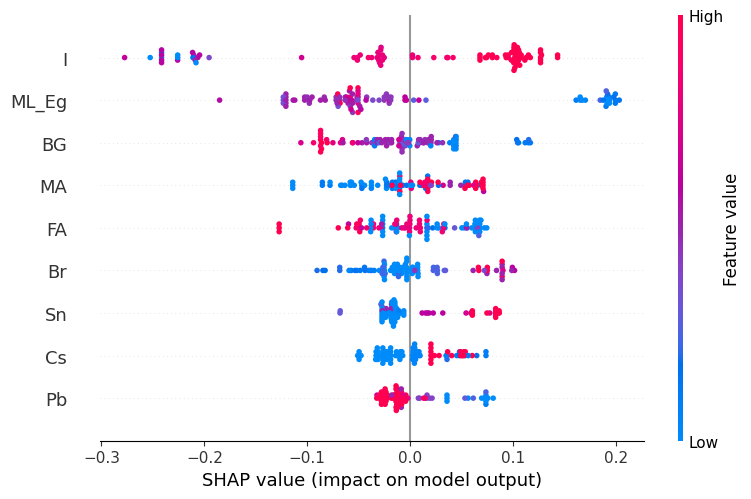

In [58]:
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values)
plt.show()

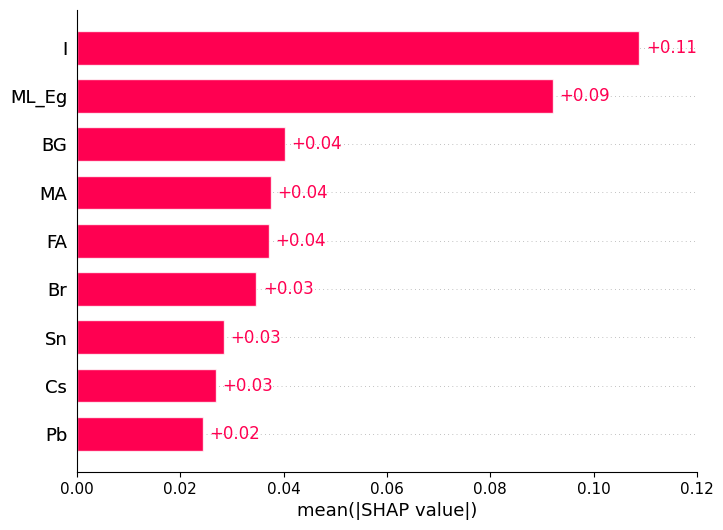

In [59]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()